# Questão 04
Utilize a rede neural perceptron de múltiplas camadas do tipo NARX (rede recorrente)
para fazer a predição de um passo
x^(n+1)
da série temporal,
x(n)  1  sen(n  sen 2 (n)) n=0,1,2,3,.... Gere inicialmente um conjunto de amostras para
o treinamento e um conjunto de amostras de teste. Avalie o desempenho mostrando a curva
a série temporal, a curva de predição e a curva do erro de predição definido como
e(n+1)=x(n+1)-x^(n+1).
Sugestão para solução:
Vetor de entrada da rede neural x(n+1)=[x(n), x(n-1), x(n-2), x(n-3)]t , corresponde uma
rede com 4 dados de entrada. Um neurônio na saída gerando a estimativa x^(n+1). A repos-
ta desejada é x(n+1) obtida diretamente da série temporal.

5/5 [==============================] - 0s 3ms/step


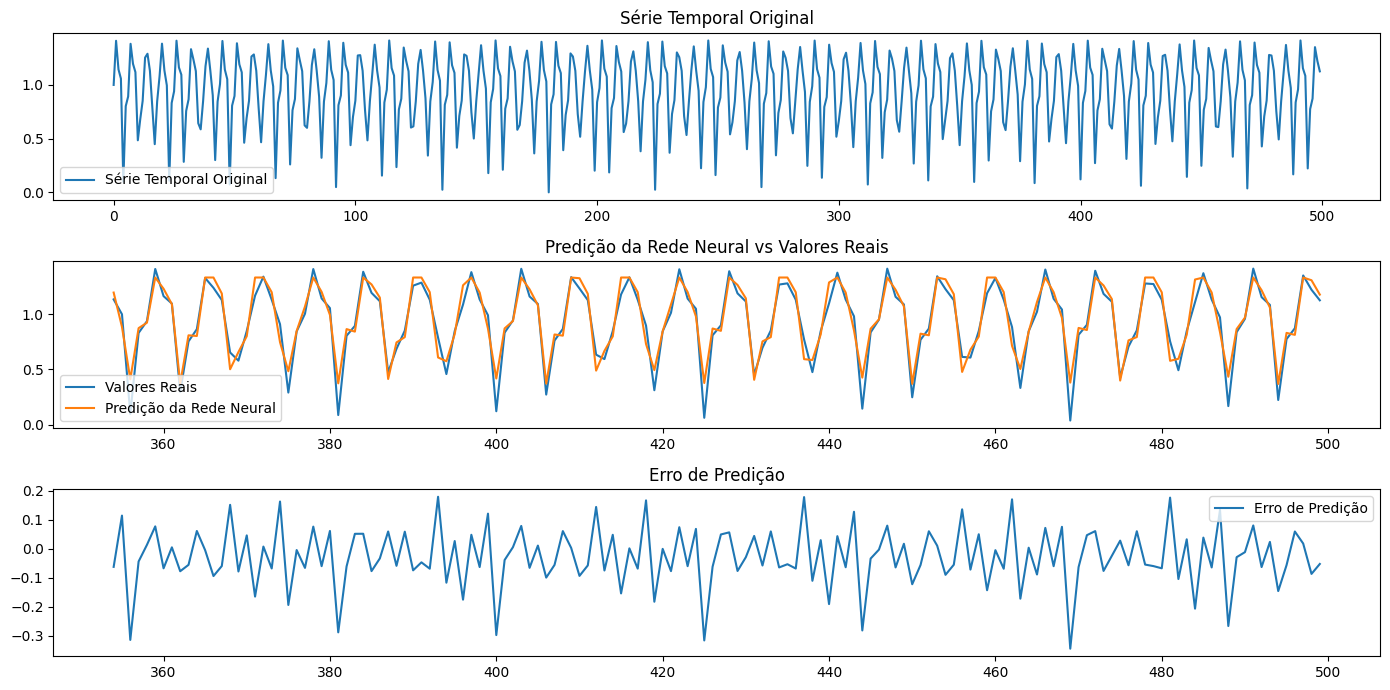

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# serie
def generate_series(n):
    return np.sqrt(1 + np.sin(n + np.sin(n) ** 2))

# Preparar os dados de entrada e saída para a rede NARX
def prepare_data(series, look_back):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:(i + look_back)])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

# Parâmetros
n_samples = 500
look_back = 4
train_size = int(n_samples * 0.7)

# Gerar a série temporal
n = np.arange(n_samples)
series = generate_series(n)


# Preparar os dados
X, y = prepare_data(series, look_back)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



# Construir a rede neural NARX
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinar a rede
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)

# Fazer a predição
y_pred = model.predict(X_test)

# Avaliar o desempenho
error = y_test - y_pred.flatten()

# Plotar os resultados
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(n, series, label='Série Temporal Original')
plt.title('Série Temporal Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n[train_size + look_back:], y_test, label='Valores Reais')
plt.plot(n[train_size + look_back:], y_pred, label='Predição da Rede Neural')
plt.title('Predição da Rede Neural vs Valores Reais')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n[train_size + look_back:], error, label='Erro de Predição')
plt.title('Erro de Predição')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# serie
def generate_series(n):
    return np.sqrt(1 + np.sin(n + np.sin(n) ** 2))

# Preparar os dados de entrada e saída para a rede NARX
def prepare_data(series, look_back):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:(i + look_back)])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

# Parâmetros
n_samples = 500
look_back = 4
train_size = int(n_samples * 0.7)

# Gerar a série temporal
n = np.arange(n_samples)

series = generate_series(n)

# Preparar os dados
X, y = prepare_data(series, look_back)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Construir a rede neural NARX
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinar a rede
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)

# Fazer a predição
y_pred = model.predict(X_test)
print("y_pred")
print(y_pred)
# Avaliar o desempenho
error = y_test - y_pred.flatten()
print("y_test")
print(y_test)

print("Error")
print(error)


5/5 [==============================] - 0s 8ms/step
y_pred
[[1.1339264 ]
 [0.9903085 ]
 [0.21366769]
 [0.8188453 ]
 [0.92857254]
 [1.4094834 ]
 [1.1725924 ]
 [1.1067356 ]
 [0.24703261]
 [0.7694957 ]
 [0.8817966 ]
 [1.3231087 ]
 [1.2298086 ]
 [1.1451622 ]
 [0.62263095]
 [0.55084693]
 [0.85132223]
 [1.1758564 ]
 [1.337386  ]
 [1.1352901 ]
 [0.90615183]
 [0.30361518]
 [0.843869  ]
 [1.0094715 ]
 [1.3914418 ]
 [1.1399262 ]
 [1.0538727 ]
 [0.18973035]
 [0.79692256]
 [0.8960182 ]
 [1.3940701 ]
 [1.2009652 ]
 [1.1340975 ]
 [0.38149545]
 [0.67691845]
 [0.8537383 ]
 [1.2557437 ]
 [1.2863914 ]
 [1.1426134 ]
 [0.78027445]
 [0.430673  ]
 [0.8589151 ]
 [1.0987949 ]
 [1.370667  ]
 [1.1343775 ]
 [0.98090124]
 [0.22131282]
 [0.82255614]
 [0.93762964]
 [1.4072266 ]
 [1.1670941 ]
 [1.1017091 ]
 [0.23508808]
 [0.7766257 ]
 [0.8855622 ]
 [1.331851  ]
 [1.2244935 ]
 [1.144784  ]
 [0.5899868 ]
 [0.5665304 ]
 [0.8505379 ]
 [1.1854348 ]
 [1.3340819 ]
 [1.1360239 ]
 [0.89587605]
 [0.31723478]
 [0.84648585]
 [1.

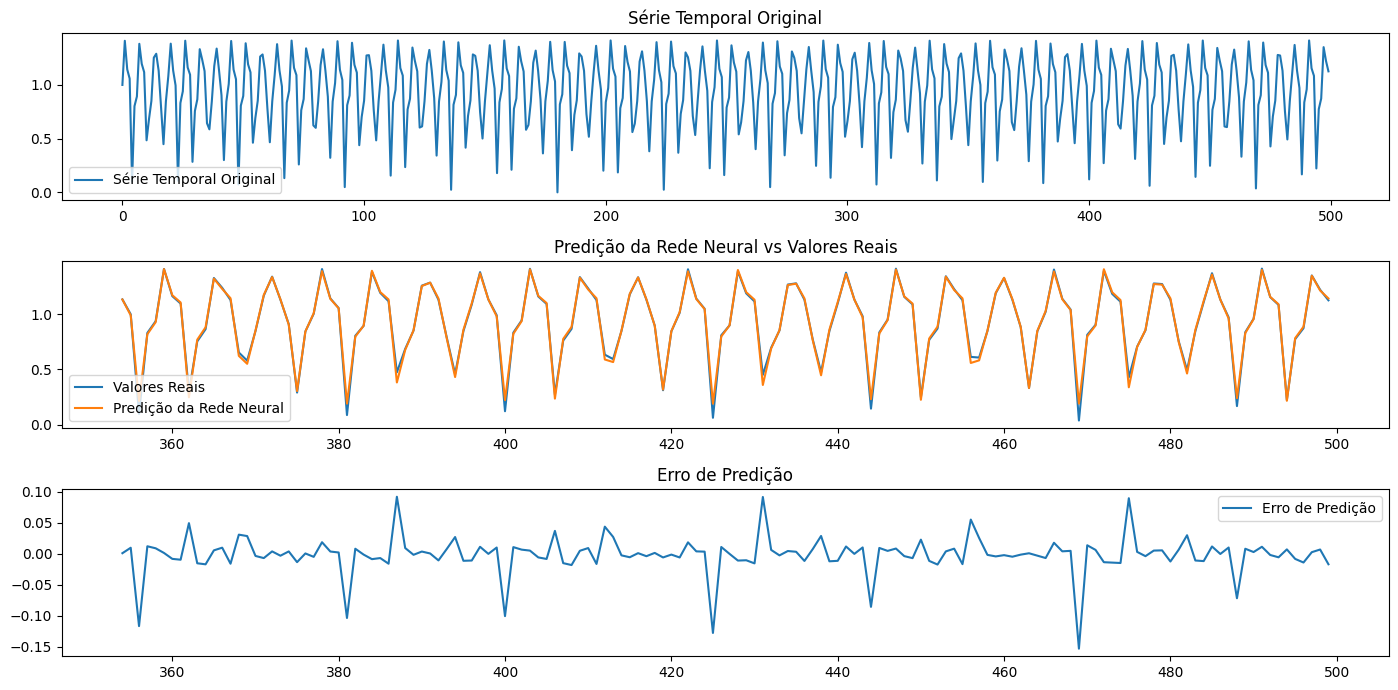

In [ ]:
# Plotar os resultados
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(n, series, label='Série Temporal Original')
plt.title('Série Temporal Original')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n[train_size + look_back:], y_test, label='Valores Reais')
plt.plot(n[train_size + look_back:], y_pred, label='Predição da Rede Neural')
plt.title('Predição da Rede Neural vs Valores Reais')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n[train_size + look_back:], error, label='Erro de Predição')
plt.title('Erro de Predição')
plt.legend()

plt.tight_layout()
plt.show()